In [18]:
#importing libraries 

import pandas as pd
import numpy as np
from nltk import tokenize
from operator import itemgetter
import math
from difflib import SequenceMatcher

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet

from sklearn.metrics.pairwise import cosine_similarity 
from sklearn.feature_extraction.text import CountVectorizer

from textblob import Word
from spellchecker import SpellChecker
import re

from sentence_transformers import SentenceTransformer

stop_words =set(stopwords.words('english'))
data=pd.read_csv("Aadhar_Faq.csv")  # reading masterfile

In [19]:
df = data.copy()
df

,Question,answer,found_duplicate
0,Where can I enrol for Aadhaar?,You have to visit an Aadhaar Enrolment centre ...,False
1,What are the documents required for enrolment ...,You need to fill up an application form availa...,False
2,Do I need to bring original documents for Aadh...,"Yes, you need to bring original copies of supp...",False
3,Do I have to pay any fee for Aadhaar enrolment?,"No, Aadhaar enrolment is totally free of cost ...",False
4,What kind of data gets captured during Aadhaar...,There are two types of data gets captured for ...,False
5,Is there any online method of getting Enroled ...,"No, you have to personally visit Aadhaar enrol...",False
6,Can I get myself Enroled for Aadhaar just by s...,"No, you have to personally visit Aadhaar enrol...",False
7,What if my demographic details mentioned on ac...,You can get your details corrected within 96 h...,False
8,How can I get the details corrected after 96 h...,If you are not able to get your details correc...,False
9,Can I get Enroled for Aadhaar if any of my fin...,"Yes, you can enrol for Aadhaar even if any or ...",False


In [20]:
# unique = data['Question'].unique()
# data =pd.DataFrame(unique,columns=['Question'])
# data

In [21]:
data = data.drop(data[data['found_duplicate'] == True].index)

In [22]:
keywords =[]
def Get_Output_list(data):  # Get output function gives out the first similar check results
        def get_top_n(dict_elem, n):  #function used in TF-IDF
            result = dict(sorted(dict_elem.items(), key = itemgetter(1), reverse = True)[:n]) 
            return result

        def synextract(a):  # This function is to extract all the synonyms and return a list of distinct synonyms
            synonyms = []
            for syn in wordnet.synsets(a):
                for lm in syn.lemmas():
                     synonyms.append(lm.name())
            return (list(set(synonyms)))

        def check_sent(word, sentences):  #function used in TF-IDF
            final = [all([w in x for w in word]) for x in sentences] 
            sent_len = [sentences[i] for i in range(0, len(final)) if final[i]]
            return int(len(sent_len))

        from difflib import SequenceMatcher 
        def similar(a, b):  # this function is used to calculate similar score using sequence matcher
            output=SequenceMatcher(None, a, b).ratio()
            return output        
        for question in data['Question']:
            total_sentences = tokenize.sent_tokenize(question)
            total_sent_len = len(total_sentences)
            total_words =question.split()
            total_word_length = len(total_words)
            tf_score ={}
            for each_word in total_words:
                each_word = each_word.replace('.','')
                if each_word not in stop_words:
                    if each_word in tf_score:
                        tf_score[each_word]+=1
                    else:
                        tf_score[each_word] =1

            tf_score.update((x,y/int(total_word_length)) for x,y in tf_score.items())
            idf_score = {}
            for each_word in total_words:
                each_word = each_word.replace('.','')
                if each_word not in stop_words:
                    if each_word in idf_score:
                        idf_score[each_word] = check_sent(each_word, total_sentences)
                    else:
                        idf_score[each_word] = 1

            idf_score.update((x, math.log(int(total_sent_len)/y)) for x, y in idf_score.items())
            tf_idf_score = {key: tf_score[key] * idf_score.get(key, 0) for key in tf_score.keys()}
            check = list(get_top_n(tf_idf_score, 5).keys())
            keywords.append(check)
        data['keywords'] = keywords
        return data

In [23]:
Get_Output_list(data)

,Question,answer,found_duplicate,keywords
0,Where can I enrol for Aadhaar?,You have to visit an Aadhaar Enrolment centre ...,False,"[Where, I, enrol, Aadhaar?]"
1,What are the documents required for enrolment ...,You need to fill up an application form availa...,False,"[What, documents, required, enrolment, Aadhaar?]"
2,Do I need to bring original documents for Aadh...,"Yes, you need to bring original copies of supp...",False,"[Do, I, need, bring, original]"
3,Do I have to pay any fee for Aadhaar enrolment?,"No, Aadhaar enrolment is totally free of cost ...",False,"[Do, I, pay, fee, Aadhaar]"
4,What kind of data gets captured during Aadhaar...,There are two types of data gets captured for ...,False,"[What, kind, data, gets, captured]"
5,Is there any online method of getting Enroled ...,"No, you have to personally visit Aadhaar enrol...",False,"[Is, online, method, getting, Enroled]"
6,Can I get myself Enroled for Aadhaar just by s...,"No, you have to personally visit Aadhaar enrol...",False,"[Can, I, get, Enroled, Aadhaar]"
7,What if my demographic details mentioned on ac...,You can get your details corrected within 96 h...,False,"[What, demographic, details, mentioned, acknow..."
8,How can I get the details corrected after 96 h...,If you are not able to get your details correc...,False,"[How, I, get, details, corrected]"
9,Can I get Enroled for Aadhaar if any of my fin...,"Yes, you can enrol for Aadhaar even if any or ...",False,"[Can, I, get, Enroled, Aadhaar]"


In [24]:
def second_simiar(old_list,user_input,similar_score):  #This function is used to filterout the final responses by calculating similar score with the user input to the results. 
    final_answer = {}
    for i in range(len(old_list)): #old_list contains the results from first sinmilarilty checker
        score = similar(user_input, old_list[i])
        if score > similar_score:
            if old_list[i] not in final_answer:
                final_answer[old_list[i]] = score
    
    sorted_Diction = sorted(final_answer.items(), key=lambda x:x[1],reverse=True) 
    
    #print(user_input)
    if (len(final_answer) >= 3):
        return (list(dict(sorted_Diction).keys())[:3])
    elif (len(final_answer) == 0):
        return ("No result found")
    else:
        return (list(dict(sorted_Diction).keys())[:len(final_answer)-1])
            

In [25]:
def check_sentence_spelling_3(sentence):  # this function is used for spell checker and append the correct spelled words to res
    
    spell = SpellChecker()    
    res =""
    avoid = ['elevance','carelon']
    
    words = sentence.split()
    
    words = [word.lower() for word in words]
    
    words = [re.sub(r'[^A-Za-z0-9]+', '', word) for word in words]

    for word in words:
        word = Word(word)
        if word not in avoid:
            misspelled = spell.unknown([word])
            for word in misspelled:
                result = spell.correction(word)
                if word != result:
                    word = result
            res += word + " "
        else:
            res += word + " "
    return (res)

In [26]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer


def Bert_Model(doc):
    n_gram_range = (1, 3)
    stop_words = "english"

# Extract candidate words/phrases
    count = CountVectorizer(ngram_range=n_gram_range, stop_words=stop_words).fit([doc])
    candidates = count.get_feature_names_out()
    model = SentenceTransformer('distilbert-base-nli-mean-tokens')
    doc_embedding = model.encode([doc])
    candidate_embeddings = model.encode(candidates)
    top_n = 10
    distances = cosine_similarity(doc_embedding, candidate_embeddings)
    keywords = [candidates[index] for index in distances.argsort()[0][-top_n:]]
    return keywords

In [27]:
Bert = [0]*len(data)
data['Bert_keywords'] = Bert

In [28]:
data

,Question,answer,found_duplicate,keywords,Bert_keywords
0,Where can I enrol for Aadhaar?,You have to visit an Aadhaar Enrolment centre ...,False,"[Where, I, enrol, Aadhaar?]",0
1,What are the documents required for enrolment ...,You need to fill up an application form availa...,False,"[What, documents, required, enrolment, Aadhaar?]",0
2,Do I need to bring original documents for Aadh...,"Yes, you need to bring original copies of supp...",False,"[Do, I, need, bring, original]",0
3,Do I have to pay any fee for Aadhaar enrolment?,"No, Aadhaar enrolment is totally free of cost ...",False,"[Do, I, pay, fee, Aadhaar]",0
4,What kind of data gets captured during Aadhaar...,There are two types of data gets captured for ...,False,"[What, kind, data, gets, captured]",0
5,Is there any online method of getting Enroled ...,"No, you have to personally visit Aadhaar enrol...",False,"[Is, online, method, getting, Enroled]",0
6,Can I get myself Enroled for Aadhaar just by s...,"No, you have to personally visit Aadhaar enrol...",False,"[Can, I, get, Enroled, Aadhaar]",0
7,What if my demographic details mentioned on ac...,You can get your details corrected within 96 h...,False,"[What, demographic, details, mentioned, acknow...",0
8,How can I get the details corrected after 96 h...,If you are not able to get your details correc...,False,"[How, I, get, details, corrected]",0
9,Can I get Enroled for Aadhaar if any of my fin...,"Yes, you can enrol for Aadhaar even if any or ...",False,"[Can, I, get, Enroled, Aadhaar]",0


In [29]:
def Bert_input_preprocess(new_output):
    final = []
    diction = {}
    indexx = 0
    bert_keys = []

    def synextract(a):  # This function is to extract all the synonyms and return a list of distinct synonyms
        synonyms = []
        for syn in wordnet.synsets(a):
            for lm in syn.lemmas():
                 synonyms.append(lm.name())
        return (list(set(synonyms)))

    def similar(a, b):  # this function is used to calculate similar score using sequence matcher
        output=SequenceMatcher(None, a, b).ratio()
        return output 

    def check_sentence_spelling_3(sentence):  # this function is used for spell checker and append the correct spelled words to res
    
        spell = SpellChecker()    
        res =""
        avoid = ['elevance','carelon','Aadhar']
        
        words = sentence.split()
        
        words = [word.lower() for word in words]
        
        words = [re.sub(r'[^A-Za-z0-9]+', '', word) for word in words]

        for word in words:
            word = Word(word)
            if word not in avoid:
                misspelled = spell.unknown([word])
                for word in misspelled:
                    result = spell.correction(word)
                    if word != result:
                        word = result
                if word != None:
                    res += word + " "
            else:
                if word != None:
                    res += word + " "
        return (res)
    count = 0
    for question in data['Question']:
        count += 1
        print(question)
        try:
            check = Bert_Model(check_sentence_spelling_3(question))
            data['Bert_keywords'][count-1] = check
            bert_keys.append(check)
            print(count)
        
        except ValueError:
            pass
    return bert_keys


In [30]:
Bert_keys = Bert_input_preprocess("how do i apply for leaves")

Where can I enrol for Aadhaar?


/var/folders/bv/54zrpjns611fgbwk4xqys0w40000gn/T/ipykernel_42719/2895833646.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Bert_keywords'][count-1] = check
/var/folders/bv/54zrpjns611fgbwk4xqys0w40000gn/T/ipykernel_42719/2895833646.py:50: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['enrol']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data['Bert_keywords'][count-1] = check


1
What are the documents required for enrolment for Aadhaar?
2
Do I need to bring original documents for Aadhaar enrolment?
3
Do I have to pay any fee for Aadhaar enrolment?
4
What kind of data gets captured during Aadhaar Enrolment?
5
Is there any online method of getting Enroled for Aadhaar?
6
Can I get myself Enroled for Aadhaar just by sending required documents by Post?
7
What if my demographic details mentioned on acknowledgement / enrolment slip are not matching with supporting documents?
8
How can I get the details corrected after 96 hours?
9
Can I get Enroled for Aadhaar if any of my fingers or iris is missing?
10
Is it mandatory to provide mobile number or email for Aadhaar enrolment?
11
Is there any age limit for Aadhaar enrolment?
12
How much time it takes to get my Aadhaar generated after the enrolment?
13
Can I get my Aadhaar letter downloaded online after it is generated?
14
Does the online downloaded Aadhaar letter have same validity as that of original?
15
I have lost 

In [31]:
print(Bert_keys)

[['enrol'], ['required', 'documents', 'enrolment', 'required enrolment', 'documents required', 'documents required enrolment'], ['bring original', 'need bring', 'need', 'original documents', 'documents', 'enrolment', 'need bring original', 'original documents enrolment', 'bring original documents', 'documents enrolment'], ['enrolment', 'pay', 'fee', 'fee enrolment', 'pay fee', 'pay fee enrolment'], ['kind data gets', 'gets', 'captured', 'data', 'gets captured', 'data gets', 'captured enrolment', 'data gets captured', 'enrolment', 'gets captured enrolment'], ['getting', 'method', 'method getting', 'enrolled', 'getting enrolled', 'method getting enrolled', 'online', 'online method', 'online method getting'], ['just sending', 'enrolled', 'documents', 'sending required', 'just sending required', 'enrolled just sending', 'required documents', 'documents post', 'required documents post', 'sending required documents'], ['matching supporting documents', 'supporting documents', 'slip matching',

In [32]:
data

,Question,answer,found_duplicate,keywords,Bert_keywords
0,Where can I enrol for Aadhaar?,You have to visit an Aadhaar Enrolment centre ...,False,"[Where, I, enrol, Aadhaar?]",[enrol]
1,What are the documents required for enrolment ...,You need to fill up an application form availa...,False,"[What, documents, required, enrolment, Aadhaar?]","[required, documents, enrolment, required enro..."
2,Do I need to bring original documents for Aadh...,"Yes, you need to bring original copies of supp...",False,"[Do, I, need, bring, original]","[bring original, need bring, need, original do..."
3,Do I have to pay any fee for Aadhaar enrolment?,"No, Aadhaar enrolment is totally free of cost ...",False,"[Do, I, pay, fee, Aadhaar]","[enrolment, pay, fee, fee enrolment, pay fee, ..."
4,What kind of data gets captured during Aadhaar...,There are two types of data gets captured for ...,False,"[What, kind, data, gets, captured]","[kind data gets, gets, captured, data, gets ca..."
5,Is there any online method of getting Enroled ...,"No, you have to personally visit Aadhaar enrol...",False,"[Is, online, method, getting, Enroled]","[getting, method, method getting, enrolled, ge..."
6,Can I get myself Enroled for Aadhaar just by s...,"No, you have to personally visit Aadhaar enrol...",False,"[Can, I, get, Enroled, Aadhaar]","[just sending, enrolled, documents, sending re..."
7,What if my demographic details mentioned on ac...,You can get your details corrected within 96 h...,False,"[What, demographic, details, mentioned, acknow...","[matching supporting documents, supporting doc..."
8,How can I get the details corrected after 96 h...,If you are not able to get your details correc...,False,"[How, I, get, details, corrected]","[details, corrected, details corrected, 96, ho..."
9,Can I get Enroled for Aadhaar if any of my fin...,"Yes, you can enrol for Aadhaar even if any or ...",False,"[Can, I, get, Enroled, Aadhaar]","[missing, enrolled, fingers, iris, iris missin..."


In [33]:
data.to_csv('Bert-TF-Keywords-Aadhar.csv', index=False) 

In [34]:
aadhar = pd.read_csv('Bert-TF-Keywords-Aadhar.csv')
aadhar

,Question,answer,found_duplicate,keywords,Bert_keywords
0,Where can I enrol for Aadhaar?,You have to visit an Aadhaar Enrolment centre ...,False,"['Where', 'I', 'enrol', 'Aadhaar?']",['enrol']
1,What are the documents required for enrolment ...,You need to fill up an application form availa...,False,"['What', 'documents', 'required', 'enrolment',...","['required', 'documents', 'enrolment', 'requir..."
2,Do I need to bring original documents for Aadh...,"Yes, you need to bring original copies of supp...",False,"['Do', 'I', 'need', 'bring', 'original']","['bring original', 'need bring', 'need', 'orig..."
3,Do I have to pay any fee for Aadhaar enrolment?,"No, Aadhaar enrolment is totally free of cost ...",False,"['Do', 'I', 'pay', 'fee', 'Aadhaar']","['enrolment', 'pay', 'fee', 'fee enrolment', '..."
4,What kind of data gets captured during Aadhaar...,There are two types of data gets captured for ...,False,"['What', 'kind', 'data', 'gets', 'captured']","['kind data gets', 'gets', 'captured', 'data',..."
5,Is there any online method of getting Enroled ...,"No, you have to personally visit Aadhaar enrol...",False,"['Is', 'online', 'method', 'getting', 'Enroled']","['getting', 'method', 'method getting', 'enrol..."
6,Can I get myself Enroled for Aadhaar just by s...,"No, you have to personally visit Aadhaar enrol...",False,"['Can', 'I', 'get', 'Enroled', 'Aadhaar']","['just sending', 'enrolled', 'documents', 'sen..."
7,What if my demographic details mentioned on ac...,You can get your details corrected within 96 h...,False,"['What', 'demographic', 'details', 'mentioned'...","['matching supporting documents', 'supporting ..."
8,How can I get the details corrected after 96 h...,If you are not able to get your details correc...,False,"['How', 'I', 'get', 'details', 'corrected']","['details', 'corrected', 'details corrected', ..."
9,Can I get Enroled for Aadhaar if any of my fin...,"Yes, you can enrol for Aadhaar even if any or ...",False,"['Can', 'I', 'get', 'Enroled', 'Aadhaar']","['missing', 'enrolled', 'fingers', 'iris', 'ir..."


In [35]:
words = aadhar['keywords'].apply(lambda x: re.findall(r"'([^']+)'", x))
aadhar['keywords'] = aadhar['keywords'].apply(lambda x: re.findall(r"'([^']+)'", x))
words_bert = aadhar['Bert_keywords'].apply(lambda x: re.findall(r"'([^']+)'", x))
aadhar['Bert_keywords'] = aadhar['Bert_keywords'].apply(lambda x: re.findall(r"'([^']+)'", x))
TF_all_keys = [value for sublist in words for value in sublist]
bert_all_keys= [value for sublist in words_bert for value in sublist]

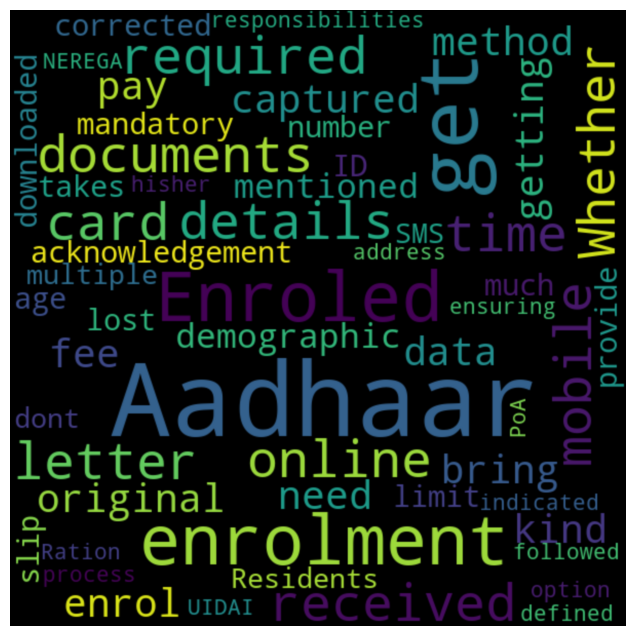

In [36]:
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
#print(total_words_list)
cleaned_words = [re.sub(r'[^a-zA-Z]', '', word) for word in TF_all_keys]
#print(cleaned_words)
words = ' '.join(cleaned_words)
wordcloud = WordCloud(height=600,width=600,max_font_size=100, stopwords=stop_words).generate(words)

plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bicubic')
plt.axis("off")
plt.show()

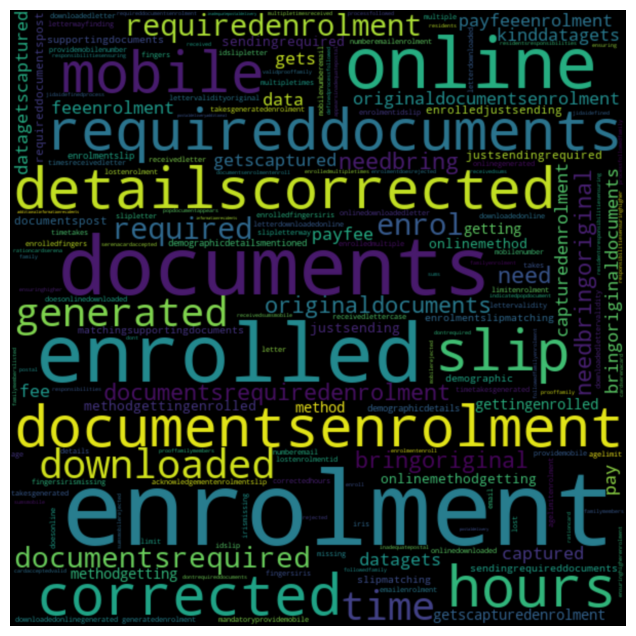

In [37]:
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
#print(total_words_list)
cleaned_words = [re.sub(r'[^a-zA-Z]', '', word) for word in bert_all_keys]
#print(cleaned_words)
words = ' '.join(cleaned_words)
wordcloud = WordCloud(height=600,width=600,max_font_size=100, stopwords=stop_words).generate(words)

plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bicubic')
plt.axis("off")
plt.show()

In [38]:
def Did_you_mean_new(user_input):
    def get_top_n(dict_elem, n):  #function used in TF-IDF
        result = dict(sorted(dict_elem.items(), key = itemgetter(1), reverse = True)[:n]) 
        return result

    def synextract(a):  # This function is to extract all the synonyms and return a list of distinct synonyms
        synonyms = []
        for syn in wordnet.synsets(a):
            for lm in syn.lemmas():
                 synonyms.append(lm.name())
        return (list(set(synonyms)))

    def check_sent(word, sentences):  #function used in TF-IDF
        final = [all([w in x for w in word]) for x in sentences] 
        sent_len = [sentences[i] for i in range(0, len(final)) if final[i]]
        return int(len(sent_len))

     
    def similar(a, b):  # this function is used to calculate similar score using sequence matcher
        output=SequenceMatcher(None, a, b).ratio()
        return output 
    
    def second_simiar(old_list,user_input,similar_score):  #This function is used to filterout the final responses by calculating similar score with the user input to the results. 
        final_answer = {}
        for i in range(len(old_list)): #old_list contains the results from first sinmilarilty checker
            score = similar(user_input, old_list[i])
            if score > similar_score:
                if old_list[i] not in final_answer:
                    final_answer[old_list[i]] = score

        sorted_Diction = sorted(final_answer.items(), key=lambda x:x[1],reverse=True) 

        #print(user_input)
        if (len(final_answer) >= 3):
            return (list(dict(sorted_Diction).keys())[:3])
        elif (len(final_answer) == 0):
            return ("No result found")
        else:
            return (list(dict(sorted_Diction).keys())[:len(final_answer)-1])

    def Input_pre_process(user_input):  # This finction has spell checker, TF IDF vectoriser and returns the key words
        new_sentence = check_sentence_spelling_2(user_input)

        total_sentences = tokenize.sent_tokenize(new_sentence)
        total_sent_len = len(total_sentences)

        total_words =new_sentence.split()
        total_word_length = len(total_words)

        tf_score ={}
        for each_word in total_words:
            each_word = each_word.replace('.','')
            if each_word not in stop_words:
                if each_word in tf_score:
                    tf_score[each_word]+=1
                else:
                    tf_score[each_word] =1

        tf_score.update((x,y/int(total_word_length)) for x,y in tf_score.items())

        idf_score = {}
        for each_word in total_words:
            each_word = each_word.replace('.','')
            if each_word not in stop_words:
                if each_word in idf_score:
                    idf_score[each_word] = check_sent(each_word, total_sentences)
                else:
                    idf_score[each_word] = 1

    # Performing a log and divide
        idf_score.update((x, math.log(int(total_sent_len)/y)) for x, y in idf_score.items())

        tf_idf_score = {key: tf_score[key] * idf_score.get(key, 0) for key in tf_score.keys()}

        new_output = []
        new_output.append(list(get_top_n(tf_idf_score, 5).keys()))

        return (new_output)
    
    def check_sentence_spelling_2(sentence):  # this function is used for spell checker and append the correct spelled words to res
        
        spell = SpellChecker()    
        res =""
        avoid = ['aadhar','Aadhar']
        
        words = sentence.split()
        
        words = [word.lower() for word in words]
        
        words = [re.sub(r'[^A-Za-z0-9]+', '', word) for word in words]

        for word in words:
            word = Word(word)
            if word not in avoid:
                misspelled = spell.unknown([word])
                for word in misspelled:
                    result = spell.correction(word)
                    if word != result:
                        word = result
                res += word + " "
            else:
                res += word + " "
        return (res)
    
    def Get_Output_new(new_output):  # Get output function gives out the first similar check results
        final = []
        diction = {}
        count = 0
        
        for check in aadhar['keywords']:
            for i in range(len(new_output[0])):
                swap = new_output[0].copy()
                for j in range(len(check)):
                    if len(set(synextract(new_output[0][i])) & set(synextract(check[j]))) > 0:
                        #print(new_output[0][i],check[j])
                        new_output[0][i] = check[j]
                        score = similar(new_output[0],check)
                        score = score - 0.05    # subtracting 0.05 just to keep the synonyms below the main keyword.
                        new_output[0][i] = swap[i]
                        if score >= 0.1:
                            if aadhar['Question'][count] not in final:
                                final.append(aadhar['Question'][count])
                                diction[aadhar['Question'][count]] = score
            count += 1
        
        sorted_Diction = sorted(diction.items(), key=lambda x:x[1],reverse=True)
        old_list = (list(dict(sorted_Diction).keys()))
        #print(old_list)
        #return old_list
        if (len(old_list) >= 3):
            return (list(dict(sorted_Diction).keys())[:3])
        elif (len(old_list) == 0):
            return ("No result found")
        else:
            return (list(dict(sorted_Diction).keys())[:len(old_list)-1])
        
    return Get_Output_new(Input_pre_process(user_input))

In [39]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer


def Bert_Model(doc):
    n_gram_range = (1, 3)
    stop_words = "english"

# Extract candidate words/phrases
    count = CountVectorizer(ngram_range=n_gram_range, stop_words=stop_words).fit([doc])
    candidates = count.get_feature_names_out()
    model = SentenceTransformer('distilbert-base-nli-mean-tokens')
    doc_embedding = model.encode([doc])
    candidate_embeddings = model.encode(candidates)
    top_n = 10
    distances = cosine_similarity(doc_embedding, candidate_embeddings)
    keywords = [candidates[index] for index in distances.argsort()[0][-top_n:]]
    return keywords

def Did_you_mean_new_bert(user_input):

    def synextract(a):  # This function is to extract all the synonyms and return a list of distinct synonyms
        synonyms = []
        for syn in wordnet.synsets(a):
            for lm in syn.lemmas():
                 synonyms.append(lm.name())
        return (list(set(synonyms)))

    def check_sent(word, sentences):  #function used in TF-IDF
        final = [all([w in x for w in word]) for x in sentences] 
        sent_len = [sentences[i] for i in range(0, len(final)) if final[i]]
        return int(len(sent_len))

     
    def similar(a, b):  # this function is used to calculate similar score using sequence matcher
        output=SequenceMatcher(None, a, b).ratio()
        return output 
    
    def second_simiar(old_list,user_input,similar_score):  #This function is used to filterout the final responses by calculating similar score with the user input to the results. 
        final_answer = {}
        for i in range(len(old_list)): #old_list contains the results from first sinmilarilty checker
            score = similar(user_input, old_list[i])
            if score > similar_score:
                if old_list[i] not in final_answer:
                    final_answer[old_list[i]] = score

        sorted_Diction = sorted(final_answer.items(), key=lambda x:x[1],reverse=True) 

        #print(user_input)
        if (len(final_answer) >= 3):
            return (list(dict(sorted_Diction).keys())[:3])
        elif (len(final_answer) == 0):
            return ("No result found")
        else:
            return (list(dict(sorted_Diction).keys())[:len(final_answer)-1])

    def Input_pre_process(user_input):  # This finction has spell checker, TF IDF vectoriser and returns the key words

        new_sentence = check_sentence_spelling_2(user_input)
        
        check = list(Bert_Model(new_sentence))
        
        new_output = []
        new_output.append(list(check))
        
        return (new_output)

    
    def check_sentence_spelling_2(sentence):  # this function is used for spell checker and append the correct spelled words to res
        
        spell = SpellChecker()    
        res =""
        avoid = ['aadhar','Aadhar']
        
        words = sentence.split()
        
        words = [word.lower() for word in words]
        
        words = [re.sub(r'[^A-Za-z0-9]+', '', word) for word in words]

        for word in words:
            word = Word(word)
            if word not in avoid:
                misspelled = spell.unknown([word])
                for word in misspelled:
                    result = spell.correction(word)
                    if word != result:
                        word = result
                res += word + " "
            else:
                res += word + " "
        return (res)
    
    def Get_Output_new(new_output):  # Get output function gives out the first similar check results
        final = []
        diction = {}
        count = 0
        for check in aadhar['Bert_keywords']:
            for i in range(len(new_output[0])):
                swap = new_output[0].copy()
                for j in range(len(check)):
                    
                    if len(set(synextract(new_output[0][i])) & set(synextract(check[j]))) > 0:
                        #print(new_output[0][i],check[j])
                        new_output[0][i] = check[j]
                        score = similar(new_output[0],check)
                        score = score - 0.05    # subtracting 0.05 just to keep the synonyms below the main keyword.
                        new_output[0][i] = swap[i]
                        if score >= 0.005:
                            if aadhar['Question'][count] not in final:
                                final.append(aadhar['Question'][count])
                                diction[aadhar['Question'][count]] = score
            count += 1

        sorted_Diction = sorted(diction.items(), key=lambda x:x[1],reverse=True)
        #print(sorted_Diction)
        old_list = (list(dict(sorted_Diction).keys()))
        #print(old_list)
        #return old_list
        if (len(old_list) >= 3):
            return (list(dict(sorted_Diction).keys())[:3])
        elif (len(old_list) == 0):
            return ("No result found")
        else:
            return (list(dict(sorted_Diction).keys())[:len(old_list)-1])
        
    return Get_Output_new(Input_pre_process(user_input))

In [40]:
aadhar['keywords'][1]

['What', 'documents', 'required', 'enrolment', 'Aadhaar?']

In [41]:

def Chatbot_response_bert(user_input):
    if user_input in list(aadhar['Question']):
        indx = (list(aadhar['Question']).index(user_input))
        ans = aadhar['answer'][indx]
        return ans
    else:
        bert_out = Did_you_mean_new_bert(user_input)
        print("I am unable to find answer for the question you have asked,But these are the relevant questions that might be helpful.\n")
        for i, question in enumerate(bert_out, 1):
            print(f"{i}. {question}")
            #print(Chatbot_response_bert(question))


In [47]:
def Chatbot_response(user_input):
    if user_input in list(aadhar['Question']):
        indx = (list(aadhar['Question']).index(user_input))
        ans = aadhar['answer'][indx]
        return ans
    else:
        bert_out = Did_you_mean_new(user_input)
        print("I am unable to find answer for the question you have asked,But these are the relevant questions that might be helpful.\n")
        for i, question in enumerate(bert_out, 1):
            print(f"{i}. {question}")
            #print(Chatbot_response_bert(question))

In [43]:
aadhar

,Question,answer,found_duplicate,keywords,Bert_keywords
0,Where can I enrol for Aadhaar?,You have to visit an Aadhaar Enrolment centre ...,False,"[Where, I, enrol, Aadhaar?]",[enrol]
1,What are the documents required for enrolment ...,You need to fill up an application form availa...,False,"[What, documents, required, enrolment, Aadhaar?]","[required, documents, enrolment, required enro..."
2,Do I need to bring original documents for Aadh...,"Yes, you need to bring original copies of supp...",False,"[Do, I, need, bring, original]","[bring original, need bring, need, original do..."
3,Do I have to pay any fee for Aadhaar enrolment?,"No, Aadhaar enrolment is totally free of cost ...",False,"[Do, I, pay, fee, Aadhaar]","[enrolment, pay, fee, fee enrolment, pay fee, ..."
4,What kind of data gets captured during Aadhaar...,There are two types of data gets captured for ...,False,"[What, kind, data, gets, captured]","[kind data gets, gets, captured, data, gets ca..."
5,Is there any online method of getting Enroled ...,"No, you have to personally visit Aadhaar enrol...",False,"[Is, online, method, getting, Enroled]","[getting, method, method getting, enrolled, ge..."
6,Can I get myself Enroled for Aadhaar just by s...,"No, you have to personally visit Aadhaar enrol...",False,"[Can, I, get, Enroled, Aadhaar]","[just sending, enrolled, documents, sending re..."
7,What if my demographic details mentioned on ac...,You can get your details corrected within 96 h...,False,"[What, demographic, details, mentioned, acknow...","[matching supporting documents, supporting doc..."
8,How can I get the details corrected after 96 h...,If you are not able to get your details correc...,False,"[How, I, get, details, corrected]","[details, corrected, details corrected, 96, ho..."
9,Can I get Enroled for Aadhaar if any of my fin...,"Yes, you can enrol for Aadhaar even if any or ...",False,"[Can, I, get, Enroled, Aadhaar]","[missing, enrolled, fingers, iris, iris missin..."


In [48]:
user_input = 'how to updte my phne number in Aadhar?'
Chatbot_response(user_input)

I am unable to find answer for the question you have asked,But these are the relevant questions that might be helpful.

1. Do I need to bring original documents for Aadhaar enrolment?
2. Do I have to pay any fee for Aadhaar enrolment?
3. What kind of data gets captured during Aadhaar Enrolment?


In [45]:
user_input = 'how to updte my phne number in Aadhar?'
Chatbot_response_bert(user_input)

I am unable to find answer for the question you have asked,But these are the relevant questions that might be helpful.

1. Is there any online method of getting Enroled for Aadhaar?
2. How much time it takes to get my Aadhaar generated after the enrolment?
3. I have received SMS on my mobile that my Aadhaar is rejected, what should I do?


In [46]:
user_input = 'Where can I enrol for Aadhaar?'
Chatbot_response(user_input)

'You have to visit an Aadhaar Enrolment centre set up by Enrolment Agency to enrol for Aadhaar. You can also search nearest Enrolment centre by clicking on Locate Enrolment Center or https://appointments.uidai.gov.in/easearch.aspx . You have to enter State, District and locality for finding the nearest enrolment centre.'